In [1]:
import pandas as pd
original  = pd.read_csv('../TOP_ZIPUP_2019.txt', sep = "\n", engine='python', encoding = "utf8")
df = original.dropna(axis = 0).reset_index()
del(df['index'])
df.columns = ['text']

import time
Morph = []
run_time = []

In [2]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

POS_PASSWORD4 = ['F', 'N']
"""
@ REFERENCE: https://www.sketchengine.eu/wp-content/uploads/Original-HanNanum-manual.pdf
F: 외국어
N: 체언
"""

def preprocess4(string):
    rst = ""
    try:
        vocab_pos = hannanum.pos(string)
        for key, tag in vocab_pos:
            # if not(tag in POS_STOPWORD):
            if tag in POS_PASSWORD4:
                rst = rst + key + " "
        return rst
    
    except: return None

# https://konlpy-ko.readthedocs.io/ko/v0.4.3/api/konlpy.tag/
df_Hannanum = pd.DataFrame()
start = time.time()
for i in range(len(df)):
    # get_morphes_by_tags(): 입력 문장에서 주어진 품사들만 추출합니다.
    df_Hannanum = df_Hannanum.append({'text' : preprocess4(df['text'][i])}, 
                             ignore_index=True)
Morph.append('Hannanum')
run_time.append(time.time()-start)
df_Hannanum.head()

,text
0,나이키 배색반집업후리스 봉봉빈티지 ♥제품명: 나이키 배색반집업후리스 ​ ♥가격: 3...
1,어커버 하프집업후리스 HALF ZIP UP SILKY FLEECE HALF ZIP ...
2,[18DAY] 남미배낭여행 (볼리비아 라파즈 시간반 이동 후 라파즈 도착 도둑 아입...
3,Made U 스윗서브 후리스반집업후드-뽀글 양털 후드티 리 것 상품명 Made U ...
4,choiroom 터틀 원피스 니트 세트 뒷면 초이룸 베스트상품 함께보 [무배]반폴라...


In [3]:
run_time

[13424.830045700073]

In [4]:
df_Hannanum.to_csv("df_Hannanum.csv", header=False, index=False)

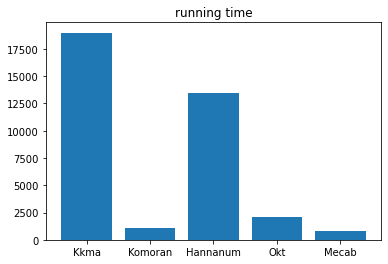

In [6]:
import matplotlib.pyplot as plt
plt.bar(['Kkma', 'Komoran', 'Hannanum', 'Okt', 'Mecab'], 
        [18989.071476221085, 1041.9504737854004, 13424.830045700073, 
        2134.6220133304596, 777.9249513149261])
plt.title("running time")
plt.show()

## 시각화

In [7]:
df_Hannanum = pd.read_csv("df_Hannanum.csv").dropna()

temp = df_Hannanum.values.tolist()
list_Hannanum = []
for sentence in temp:
    temp2 = sentence[0].split()
    for vocab in temp2:
        list_Hannanum.append(vocab)
series_Hannanum = pd.Series(list_Hannanum)
Hannanum_counts = series_Hannanum.value_counts()
Hannanum_counts

번개장터        22651
가격          20703
사이즈         18039
판매          17312
원           13355
            ...  
$25             1
#마이클코어스,        1
윈터덕             1
키스(KITH)        1
블루밍,            1
Length: 197565, dtype: int64

<AxesSubplot:title={'center':'Mecab'}>

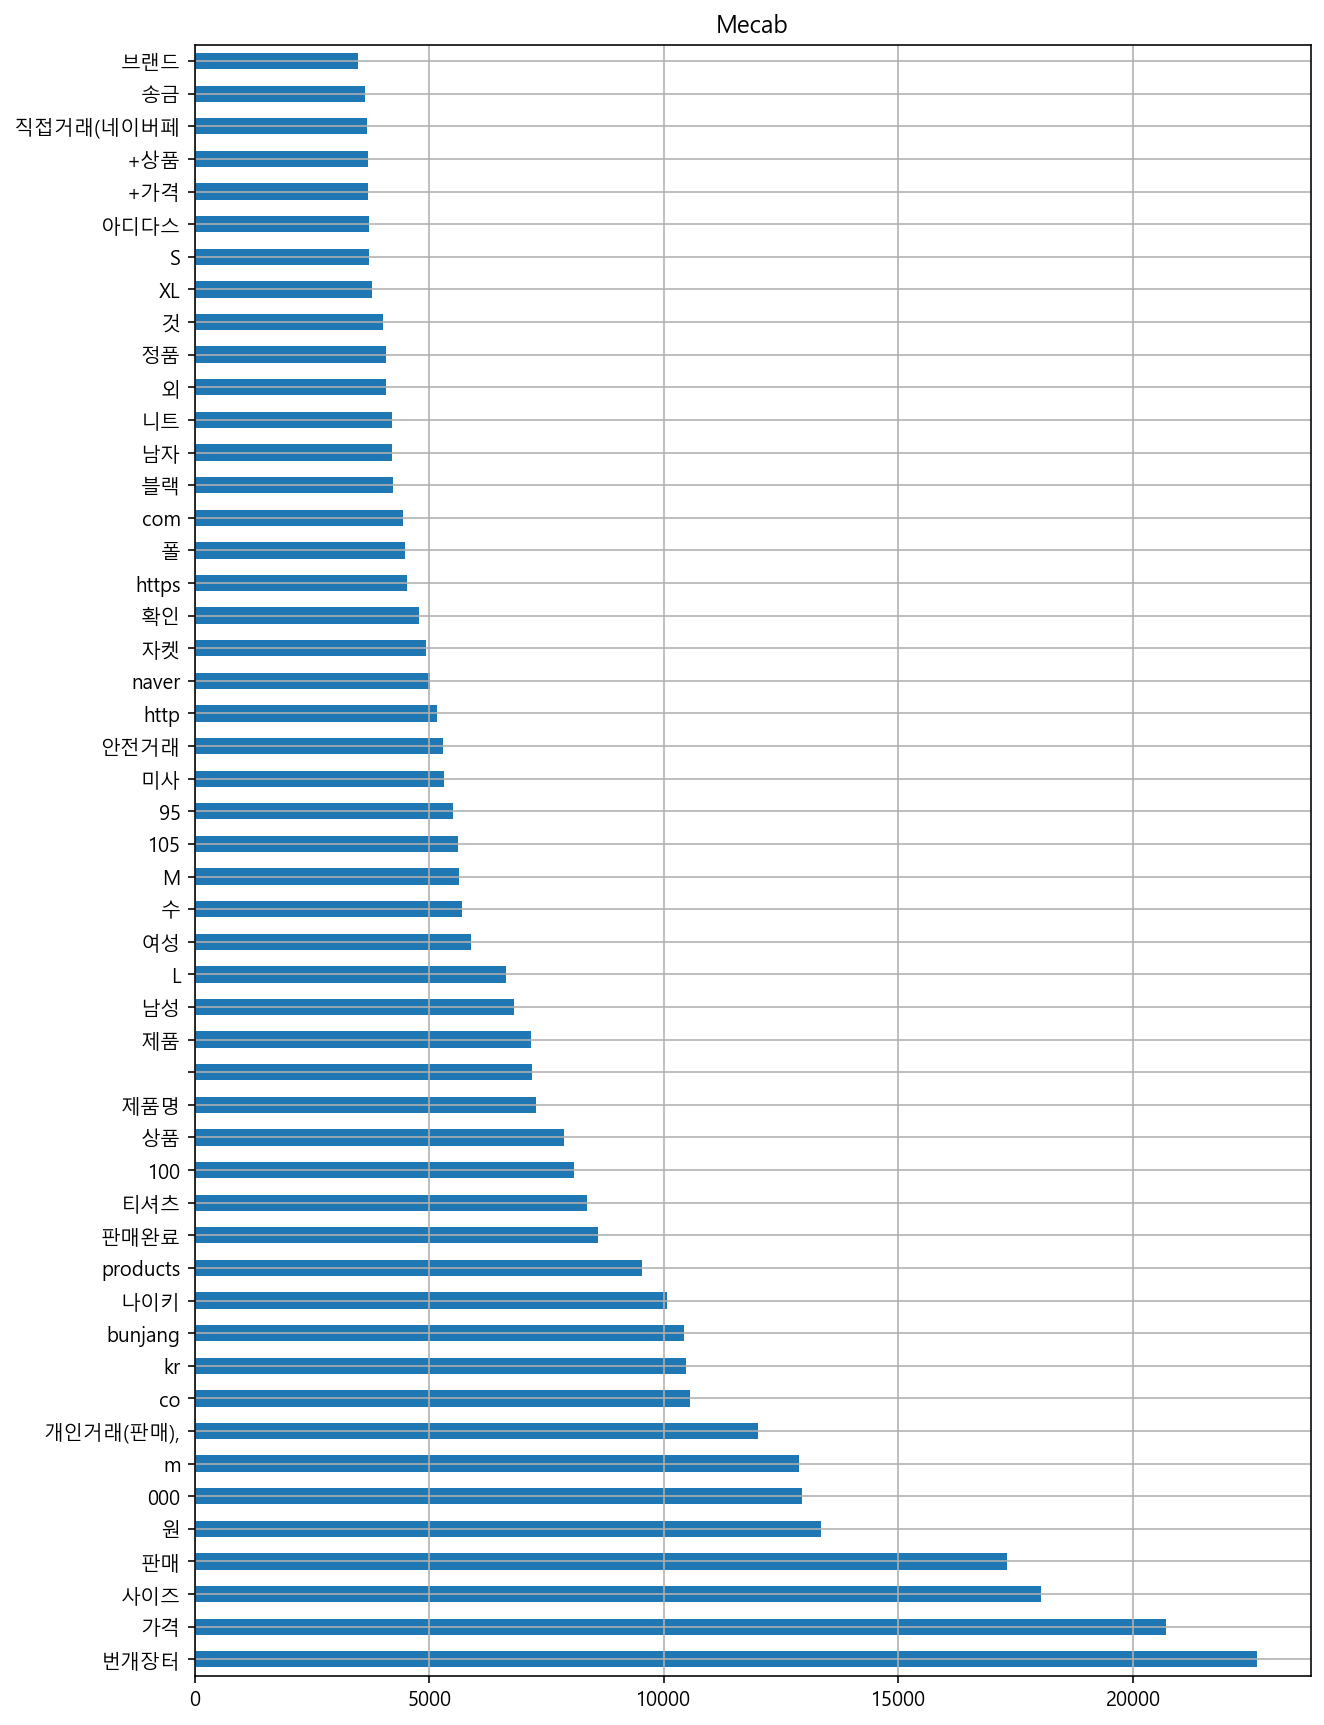

In [8]:
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('font',family = "Malgun Gothic")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
Hannanum_counts.head(50).plot(figsize=(10,15),kind='barh',grid=True, title='Mecab')